In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import norm

data=pd.read_csv("energydata_complete.csv")
data=data.drop(['date'],axis=1)
data=(data-data.mean())/data.std()#normalising
print(data.head())

   Appliances    lights        T1      RH_1        T2      RH_2        T3  \
0   -0.367666  3.301180 -1.118616  1.843774 -0.520398  1.073656 -1.235032   
1   -0.367666  3.301180 -1.118616  1.616766 -0.520398  1.057071 -1.235032   
2   -0.465204  3.301180 -1.118616  1.517921 -0.520398  1.033523 -1.235032   
3   -0.465204  4.561263 -1.118616  1.459284 -0.520398  1.024514 -1.235032   
4   -0.367666  4.561263 -1.118616  1.526298 -0.520398  1.009771 -1.235032   

       RH_3        T4      RH_4  ...        T9      RH_9     T_out  \
0  1.686087 -0.908194  1.506399  ... -1.217293  0.958112 -0.152643   
1  1.704523 -0.908194  1.604488  ... -1.200748  0.965338 -0.174583   
2  1.748563 -0.944091  1.580878  ... -1.233838  0.950886 -0.196524   
3  1.769047 -0.962039  1.542487  ... -1.233838  0.926798 -0.218464   
4  1.769047 -0.962039  1.497953  ... -1.233838  0.926798 -0.240405   

   Press_mm_hg   RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0    -2.976252  0.82206   1.207663  

In [2]:
colnames=data.columns.tolist()
colnames

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [3]:
import seaborn as sns
corr=data.iloc[:,[1,22,23,24,25,26,27]].corr()

sns.heatmap(corr)


In [4]:
y=data.Appliances

df=data.drop(['Appliances'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(15788, 27) (15788,)
(3947, 27) (3947,)


In [5]:
print (X_train.values, y_train.values)

[[-0.47906764 -0.4274865  -1.22125517 ... -0.67006981 -1.53728417
  -1.53728417]
 [ 0.78101498  0.74930226 -0.51761362 ...  0.30339292  1.33006582
   1.33006582]
 [ 2.04109759  0.6870383  -2.07567706 ... -0.80118928  0.02236514
   0.02236514]
 ...
 [-0.47906764  0.54798213 -0.22526731 ...  0.23584653  0.49307289
   0.49307289]
 [-0.47906764  0.37571852 -0.1909229  ...  0.37491263  1.17569715
   1.17569715]
 [-0.47906764  0.31968096  1.19123014 ...  1.78146695 -0.35953549
  -0.35953549]] [-0.36766641 -0.56274099 -0.17259183 ... -0.27012912 -0.07505454
  0.02248275]


linear regression

In [6]:
class broom_model():
    
       
    def __init__(self,xi:pd.core.frame.DataFrame,y:pd.core.series.Series):
        
        ones = pd.DataFrame({'(intercept)':np.ones((xi.shape[0],))},index=xi.index)
        xi=pd.concat((ones,xi),1)
        (self.x,self.y) = (xi,y)
        x = self.x
        (self.n,self.r) = x.shape
        self.index = x.columns
        self.params = np.linalg.lstsq(x.T@x,x.T@y)
        self.params=self.params[0]
        self.predict=pd.Series(self.x.values@self.params,index=x.index,name=self.y.name)
        self.fitted=self.predict
        self.resid=self.y-self.fitted
    
   
    def vcov_params(self)->np.matrix:
        e = self.resid
        x = self.x
        xxi = np.linalg.pinv(x.T@x)
        return np.power(e,2).mean()*xxi
    def se(self)->np.matrix: return np.sqrt(np.diagonal(self.vcov_params()))
    def t_stat(self)->np.matrix: return self.params/self.se()
    def p_val(self)->np.matrix: return norm.cdf(-np.abs(self.t_stat()))*2
    def conf_int(self,level:float)->np.matrix: return None
    def tidy(self,confint=False,level=0.95)->pd.core.frame.DataFrame: 
        df = [self.params,self.se(),self.t_stat(),self.p_val()]
        df = np.vstack(df)
        df = pd.DataFrame(df.T,index=self.index)
        df.columns = ['est','std.err','t.stat','p.val']
        return df
    

In [7]:

model=broom_model(X_train,y_train)
print(model.tidy())


                  est   std.err     t.stat          p.val
(intercept) -0.000675  0.007289  -0.092565   9.262488e-01
lights       0.154476  0.008271  18.676586   7.677499e-78
T1           0.002665  0.032168   0.082857   9.339650e-01
RH_1         0.614950  0.029032  21.181418   1.417022e-99
T2          -0.369435  0.038915  -9.493425   2.235644e-21
RH_2        -0.537831  0.034088 -15.777910   4.415693e-56
T3           0.499719  0.023064  21.666793  4.221521e-104
RH_3         0.113587  0.024136   4.706082   2.525231e-06
T4          -0.074029  0.022890  -3.234099   1.220272e-03
RH_4        -0.013673  0.030154  -0.453435   6.502358e-01
T5          -0.011008  0.023552  -0.467392   6.402197e-01
RH_5         0.013634  0.008581   1.588882   1.120870e-01
T6           0.409089  0.042136   9.708828   2.764969e-22
RH_6         0.093070  0.023007   4.045274   5.226201e-05
T7           0.045674  0.030624   1.491457   1.358416e-01
RH_7        -0.069540  0.024047  -2.891830   3.830056e-03
T8           0

C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


Gradient descent

alpha 0.001, threshold 0.001, iteration 1000, train error 0.44395397968757727 
The test error is 0    0.858128
dtype: float64
alpha 0.005, threshold 0.001, iteration 1000, train error 0.17156680168097385 
The test error is 0    0.57569
dtype: float64
alpha 0.01, threshold 0.001, iteration 1000, train error 0.11742185885655393 
The test error is 0    0.517298
dtype: float64
alpha 0.05, threshold 0.001, iteration 1000, train error 0.06727441341548593 
The test error is 0    0.457296
dtype: float64
alpha 0.1, threshold 0.001, iteration 1000, train error 0.06027142705767498 
The test error is 0    0.445754
dtype: float64


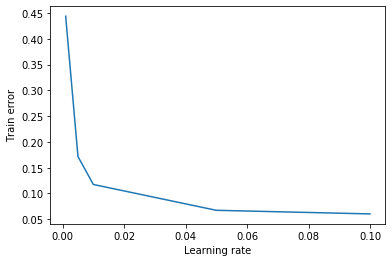

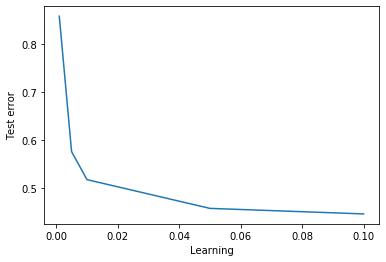

alpha 0.1, threshold 1e-06, iteration 1000, train error 0.05689707623619787 
The test error is 0    0.434424
dtype: float64
alpha 0.1, threshold 1e-05, iteration 1000, train error 0.05689707623619787 
The test error is 0    0.434424
dtype: float64
alpha 0.1, threshold 0.0001, iteration 1000, train error 0.05692649732977088 
The test error is 0    0.435693
dtype: float64
alpha 0.1, threshold 0.001, iteration 1000, train error 0.06027142705767498 
The test error is 0    0.445754
dtype: float64
alpha 0.1, threshold 0.01, iteration 1000, train error 0.1095682016751269 
The test error is 0    0.501196
dtype: float64
alpha 0.1, threshold 0.1, iteration 1000, train error 0.3903728830788934 
The test error is 0    0.736733
dtype: float64


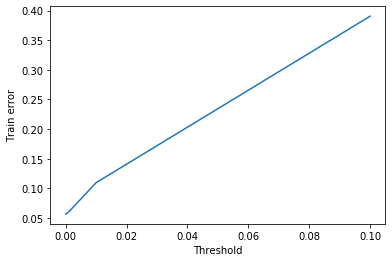

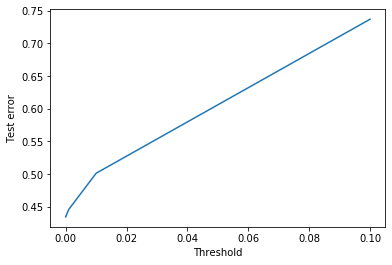

alpha 0.1, threshold 1e-06, iteration 10, train error 0.20487672713258487 
The test error is 0    0.586252
dtype: float64
alpha 0.1, threshold 1e-06, iteration 50, train error 0.05689707623619787 
The test error is 0    0.434424
dtype: float64
alpha 0.1, threshold 1e-06, iteration 100, train error 0.05689707623619787 
The test error is 0    0.434424
dtype: float64
alpha 0.1, threshold 1e-06, iteration 500, train error 0.05689707623619787 
The test error is 0    0.434424
dtype: float64
alpha 0.1, threshold 1e-06, iteration 1000, train error 0.05689707623619787 
The test error is 0    0.434424
dtype: float64
alpha 0.1, threshold 1e-06, iteration 5000, train error 0.05689707623619787 
The test error is 0    0.434424
dtype: float64
alpha 0.1, threshold 1e-06, iteration 10000, train error 0.05689707623619787 
The test error is 0    0.434424
dtype: float64


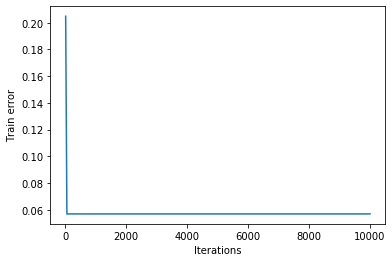

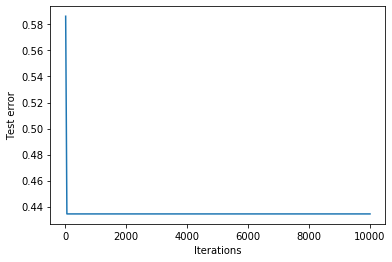

In [8]:
import matplotlib.pyplot as plt

def grad_descent(inp,target,learn_rate, threshold, iter_val):
    
    
    length=inp.shape[0]
    #ones=np.ones([input.shape[0],1])
    #input=np.concatenate((ones,input),axis=1)
    
    coeff=np.ones(inp.shape[1]).reshape(1,inp.shape[1])
    coeff=coeff*(0.5)
    intercept=0.5
    #coeff=np.random.randint(-1,1,size=(1,input.shape[1]))
    
    target=pd.DataFrame(target)
    
    cost=np.array([])
    
    final_cost = 0
    not_converge=True
    for j in range(iter_val):
        
        predict=(inp@(coeff.T))+intercept
        error=np.subtract(predict,target)
        se=np.sum(((predict)**2))
        cost_func=se/(2*length)
        
        coeff=coeff-((learn_rate/length)*(((inp.T)@(error)).T))
        
        intercept=intercept-((learn_rate/length)*np.sum(error))
        cost=np.append(cost,cost_func)
        
        
        ##print(i,cost_func)
    
        if j>0 and abs(cost[j]-cost[j-1])<threshold:   #checking threshold
            not_converge=False
            final_cost=cost[j]
            print("alpha {}, threshold {}, iteration {}, train error {} ".format(learn_rate, threshold, iter_val,cost[j]))
            break
    if(not_converge):
            final_cost=cost[(iter_val-1)]
            print("alpha {}, threshold {}, iteration {}, train error {} ".format(learn_rate, threshold, iter_val,final_cost))
            
    return coeff, intercept,final_cost

def linear_test(input_test,target_test, coeff,intercept):

    length_test=input_test.shape[0]
    #ones=np.ones([input_test.shape[0],1])
    #input_test=np.concatenate((ones,input_test),axis=1)
    target_test=pd.DataFrame(target_test)
    model=(input_test@(coeff.T))+intercept
    error_model=np.subtract(model,target_test)
    mse=(np.sum(error_model**2)/(2*length_test))
    
 
    print("The test error is {}".format(mse))
    return mse



alpha_vals = [0.001,0.005,0.01,0.05,0.1]
threshold_vals = [0.000001,0.00001,0.0001,0.001,0.01,0.1]
iterations = [10,50,100,500,1000,5000,10000]

train_error = np.array([])
test_error = np.array([])

#cost vs alpha
for i in range(len(alpha_vals)):
    coeff, intercept,cost_func= grad_descent(X_train.values,y_train.values,alpha_vals[i],0.001,1000)
    mse= linear_test(X_test.values,y_test.values, coeff,intercept)
    
    train_error= np.append(train_error,cost_func)
    test_error = np.append(test_error, mse)
plt.plot(alpha_vals,train_error)
plt.xlabel("Learning rate")
plt.ylabel("Train error")
plt.show()
plt.plot(alpha_vals,test_error)
plt.xlabel("Learning")
plt.ylabel("Test error")
plt.show()

#cost vs Threshold
train_error_threshold = np.array([])
test_error_threshold = np.array([])
for i in range(len(threshold_vals)):
    coeff, intercept,cost_func= grad_descent(X_train.values,y_train.values,0.1,threshold_vals[i],1000)
    mse= linear_test(X_test.values,y_test.values, coeff,intercept)
    
    train_error_threshold= np.append(train_error_threshold,cost_func)
    test_error_threshold= np.append( test_error_threshold, mse)

plt.plot(threshold_vals,train_error_threshold)
plt.xlabel("Threshold")
plt.ylabel("Train error")
plt.show()
plt.plot(threshold_vals,test_error_threshold)
plt.xlabel("Threshold")
plt.ylabel("Test error")
plt.show()

#cost vs iter
train_error_iter = np.array([])
test_error_iter= np.array([])
for i in range(len(iterations)):
    coeff, intercept,cost_func= grad_descent(X_train.values,y_train.values,0.1,0.000001,iterations[i])
    mse= linear_test(X_test.values,y_test.values, coeff,intercept)
    
    train_error_iter= np.append(train_error_iter,cost_func)
    test_error_iter= np.append( test_error_iter, mse)

plt.plot(iterations,train_error_iter)
plt.xlabel("Iterations")
plt.ylabel("Train error")
plt.show()
plt.plot(iterations,test_error_iter)
plt.xlabel("Iterations")
plt.ylabel("Test error")
plt.show()


Linear regression with scikit

In [9]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

-0.0006746826704466331
[ 0.15447579  0.00266532  0.61494951 -0.36943532 -0.53783068  0.49971896
  0.1135873  -0.07402922 -0.01367272 -0.01100793  0.01363371  0.40908894
  0.09307012  0.04567384 -0.06953962  0.14395792 -0.23485628 -0.31103902
 -0.02434789 -0.47586447  0.00986666 -0.12851992  0.03930871  0.01810615
  0.16602569 -0.00831475 -0.00831475]


In [10]:
from sklearn import linear_model
lin_model=linear_model.SGDRegressor(alpha=0.1,max_iter=1000, tol=1e-6,fit_intercept=True,
                                    penalty='l2',loss='squared_loss',shuffle=False)
lin_model.fit(X_train,y_train)
print(lin_model.intercept_)
print(lin_model.coef_)
#SGDRegressor(alpha=0.001, average=False, early_stopping=False,
       #epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       #learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       #n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
       #shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
       #warm_start=False)

[-0.00405747]
[ 1.54003750e-01 -4.87721692e-02  2.42920204e-01  2.30884721e-02
 -1.04607421e-01  2.31240853e-01  8.24522139e-02 -7.28968098e-02
 -9.24428254e-03 -6.41918323e-02  1.46481134e-02  8.14663826e-02
  9.32086493e-03 -1.94797460e-02 -8.68479268e-02  4.37934550e-02
 -1.52969480e-01 -9.55247669e-02 -4.76627345e-02 -2.23792887e-02
 -1.31236105e-02 -4.33967999e-02  3.82065772e-02  8.61781247e-03
 -3.67677212e-02  2.24606871e-04  2.24606871e-04]


selecting 10 random features

In [11]:

df=data.drop(['Appliances'],axis=1)
cols=np.random.randint(1,27,10)
df_feat=df.iloc[:,cols]
print(df_feat.columns)


X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(df_feat, y, test_size=0.2)

coeff, intercept,cost_func= grad_descent(X_train_feat.values,y_train_feat.values,0.1,0.000001,1000)
mse= linear_test(X_test_feat.values,y_test_feat.values, coeff,intercept)



Index(['rv1', 'RH_6', 'RH_2', 'Tdewpoint', 'T1', 'Press_mm_hg', 'RH_out',
       'Tdewpoint', 'T4', 'T3'],
      dtype='object')
alpha 0.1, threshold 1e-06, iteration 1000, train error 0.02225380055802354 
The test error is 0    0.450819
dtype: float64


Selecting 10 best features

In [12]:


df_best=df.iloc[:,[0,3,4,5,6,15,16,19,21,22]]
print(df_best.columns)


X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(df_best, y, test_size=0.2)

coeff, intercept,cost_func= grad_descent(X_train_best.values,y_train_best.values,0.1,0.000001,1000)
mse= linear_test(X_test_best.values,y_test_best.values, coeff,intercept)


Index(['lights', 'T2', 'RH_2', 'T3', 'RH_3', 'T8', 'RH_8', 'T_out', 'RH_out',
       'Windspeed'],
      dtype='object')
alpha 0.1, threshold 1e-06, iteration 1000, train error 0.04051952475707314 
The test error is 0    0.477822
dtype: float64


Best model

In [13]:
coeff, intercept,cost_func= grad_descent(X_train.values,y_train.values,0.1,0.000001,1000)


mse= linear_test(X_test.values,y_test.values, coeff,intercept)

alpha 0.1, threshold 1e-06, iteration 1000, train error 0.05689707623619787 
The test error is 0    0.434424
dtype: float64


Logistic Regression

In [15]:
from sklearn.linear_model import SGDClassifier
a=np.array([])
for i in range(len(y)):
    
    if y[i]>=(y.median(axis=0)):
        a=np.append(a,1)
    elif y[i]<(y.median(axis=0)):
        a=np.append(a,0)
df=df.assign(Class=a) 
y=df.Class
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(df, y, test_size=0.2)



clf = SGDClassifier(alpha=0.1,loss="log", penalty="l2", max_iter=1000,shuffle=False,tol=0.000001)
clf.fit(X_train_logit, y_train_logit)

y_train_predict=clf.predict(X_train_logit)
y_test_predict=clf.predict(X_test_logit)
print(y_test_predict)


[1. 0. 0. ... 0. 1. 1.]


In [ ]:

alpha_vals = [0.001,0.005,0.01,0.05,0.1]
threshold_vals = [0.000001,0.00001,0.0001,0.001,0.01,0.1]
iterations = [100,500,1000,5000,10000]

def mse_logit(target_logit,predict_logit):
    target_logit=pd.DataFrame(target_logit)
    predict_logit=pd.DataFrame(predict_logit)
    
    mse=(1/len(target_logit))*((target_logit.T.values@predict_logit)+((1-target_logit).T.values@(1-predict_logit)))
    
    return mse.values
train_error_logit_alpha = np.array([])
test_error_logit_alpha= np.array([])
for i in alpha_vals:
  clf = SGDClassifier(alpha=i,loss="log", penalty="l2", max_iter=1000,shuffle=False,tol=0.00001)
  clf.fit(X_train_logit, y_train_logit)

  y_train_predict=clf.predict(X_train_logit)
  y_test_predict=clf.predict(X_test_logit)
  train_error_logit=mse_logit(y_train_logit,y_train_predict)
  test_error_logit=mse_logit(y_test_logit,y_test_predict)
  train_error_logit_alpha = np.append( train_error_logit_alpha,train_error_logit)
  test_error_logit_alpha= np.append( test_error_logit_alpha,test_error_logit)
  print("alpha {}, Threshold {}, Train error {}, Test error {}" .format(i, 0.000001, train_error_logit, test_error_logit))
  
plt.plot(train_error_logit_alpha,alpha_vals)
plt.xlabel("Learning rate")
plt.ylabel("Train error")
plt.show()
plt.plot(test_error_logit_alpha,alpha_vals)
plt.xlabel("Learning rate")
plt.ylabel("Test error")
plt.show()
  
  
  
for i in threshold_vals:
  clf = SGDClassifier(alpha=0.1,loss="log", penalty="l2", max_iter=1000,shuffle=False,tol=i)
  clf.fit(X_train_logit, y_train_logit)

  y_train_predict=clf.predict(X_train_logit)
  y_test_predict=clf.predict(X_test_logit)
  train_error_logit=mse_logit(y_train_logit,y_train_predict)
  test_error_logit=mse_logit(y_test_logit,y_test_predict)
  
  print("alpha {}, THreshold {}, Train error {}, Test error {}" .format(0.1 , i, train_error_logit, test_error_logit))

for i in iterations:
  clf = SGDClassifier(alpha=0.1,loss="log", penalty="l2", max_iter=i ,shuffle=False,tol=0.000001)
  clf.fit(X_train_logit, y_train_logit)

  y_train_predict=clf.predict(X_train_logit)
  y_test_predict=clf.predict(X_test_logit)
  train_error_logit=mse_logit(y_train_logit,y_train_predict)
  test_error_logit=mse_logit(y_test_logit,y_test_predict)
  
  print("alpha {}, THreshold {}, Iter {}, Train error {}, Test error {}" .format(0.1 , 0.01, i, train_error_logit, test_error_logit))
  


Best logit model

In [ ]:
clf = SGDClassifier(alpha=0.1,loss="log", penalty="l2", max_iter=100,shuffle=False,tol=0.01)
clf.fit(X_train_logit, y_train_logit)

print(clf.intercept_)
print(clf.coef_)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_logit,y_train_predict)

In [ ]:
tn,fp,fn,tp=confusion_matrix(y_train_logit,y_train_predict).ravel()
print(tn,fp,fn,tp)
accuracy=(tn+tp)/(tn+fp+fn+tp)
print(accuracy)